# **Higgs Boson Detection Project**

This notebook implements various machine learning techniques to detect Higgs bosons using the CERN dataset. The project combines ensemble learning methods and evolutionary algorithms to create and compare different classification approaches.

## Project Structure
1. Data Preprocessing
2. Ensemble Learning Implementation
   - Bagging (Random Forest)
   - Boosting (XGBoost/Gradient Boosting)
3. Evolutionary Learning with DEAP
4. Performance Comparison
5. Comparative Analysis

## I- Data Preprocessing

In this section, we will:
1. Load and explore the dataset
2. Handle missing values
3. Normalize features
4. Split data into training and testing sets
5. Perform feature selection (optional)

### 1- Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import csv
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

### 2- Loading and Exploring the Dataset

The Higgs Boson dataset is available from CERN's Open Data portal: http://opendata.cern.ch/record/328

In [2]:
dataFilename = 'atlas-higgs.csv'
data = pd.read_csv(dataFilename)
print("Dataset shape:", data.shape)
print("\nData types:")
print(data.dtypes)
print("\nFirst few rows:")
data.head()

Dataset shape: (818238, 35)

Data types:
EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt     

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


### 3- Data Cleaning

Remove unnecessary columns and convert labels to binary format

In [3]:
# Remove superfluous columns
del(data['EventId'])
del(data['Weight'])
del(data['KaggleSet'])
del(data['KaggleWeight'])

# Convert labels to binary
data['Label'] = data['Label'].map({'s': 1, 'b': 0})
data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


### 4- Handling Missing Values

Replace missing values (marked as -999) using median imputation

In [4]:
# Store column names
column_names = data.columns

# Impute missing values
imputer = SimpleImputer(missing_values=-999, strategy='median')
data_imputed = imputer.fit_transform(data)

# Convert back to DataFrame
data = pd.DataFrame(data_imputed, columns=column_names)

### 5- Outliers
Check the dataset for outliers by displaying the boxplots of all columns.

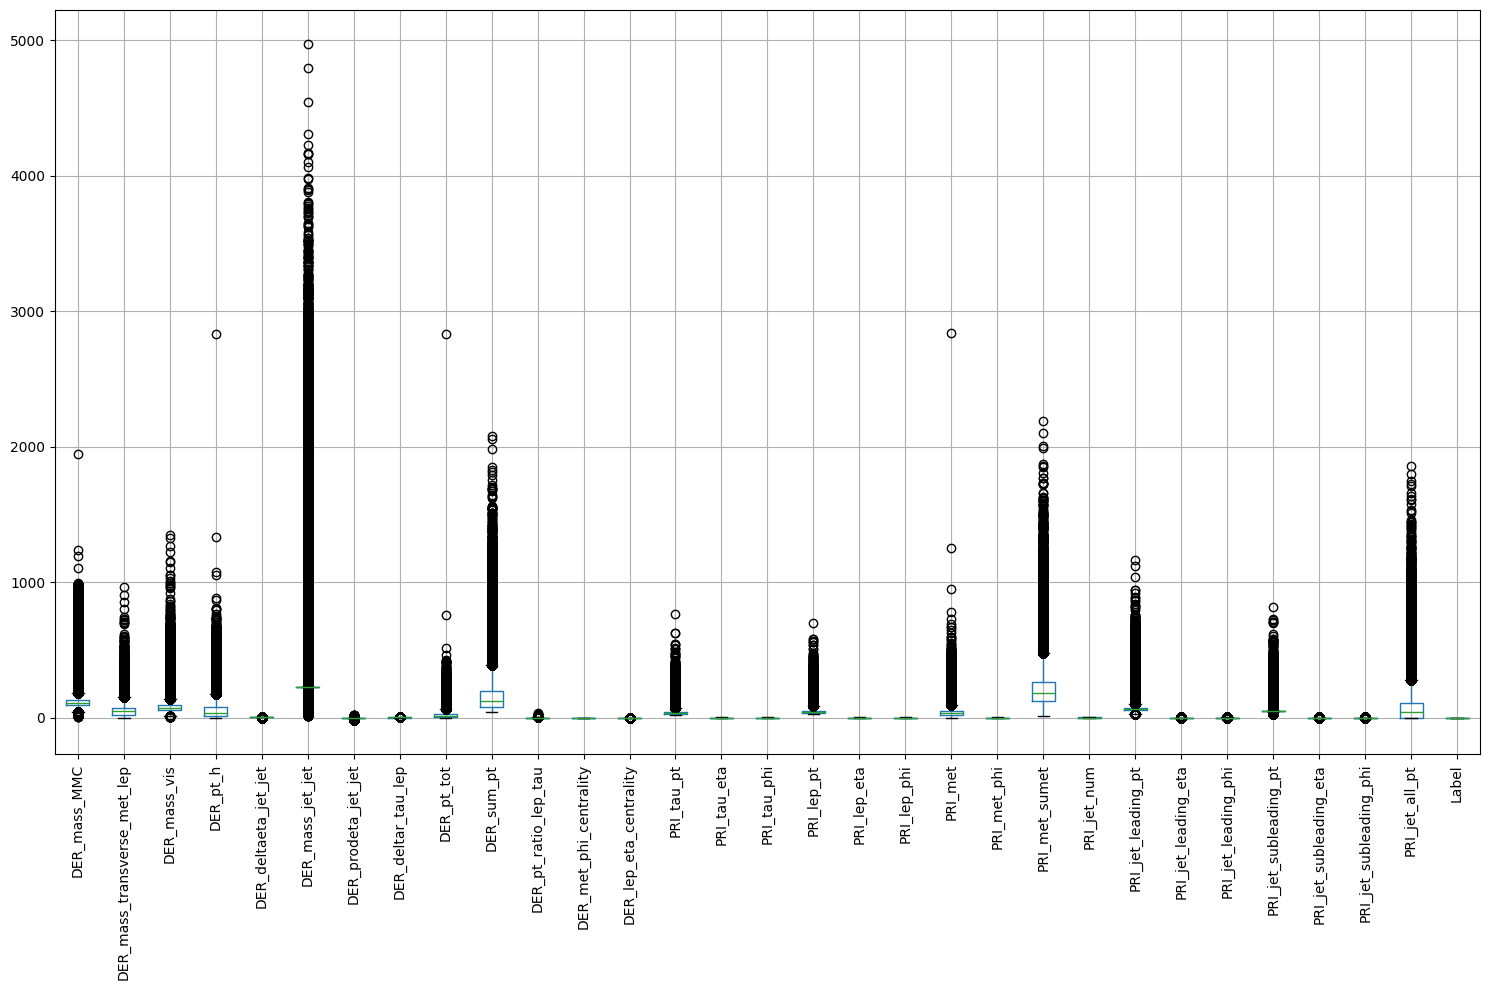

In [5]:
#affichage des boxplot des différents attributs

data.boxplot(figsize=(15, 10))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 6- Feature Scaling

Normalize features using MinMaxScaler

In [6]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

### 7- Visualisation of metrics relationships

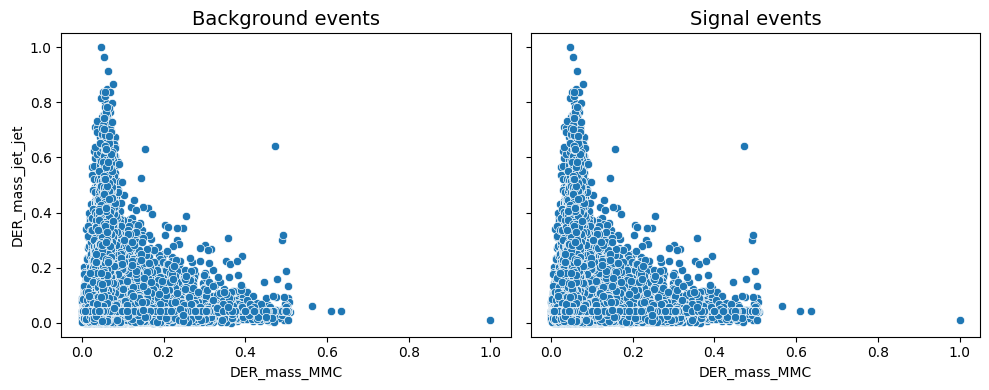

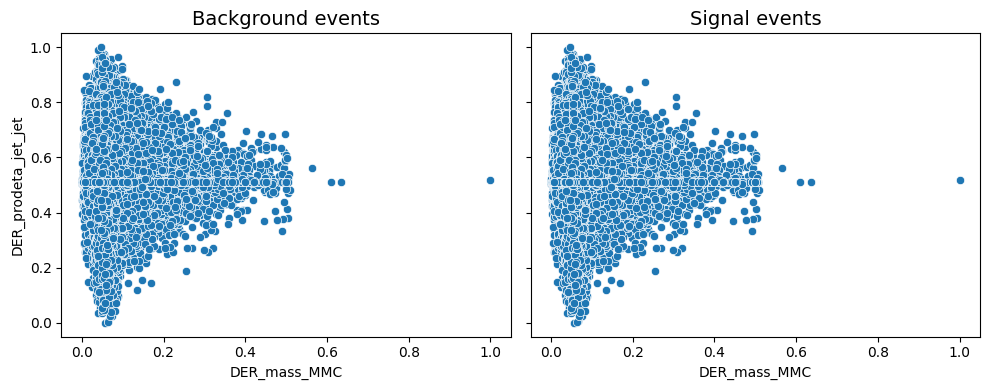

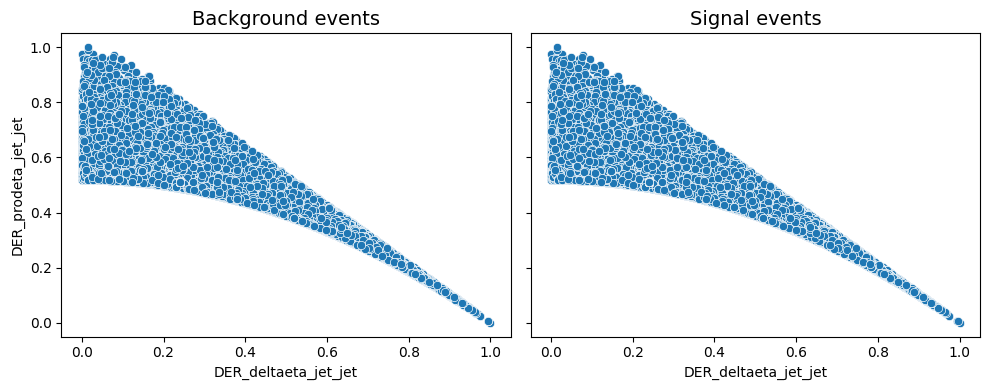

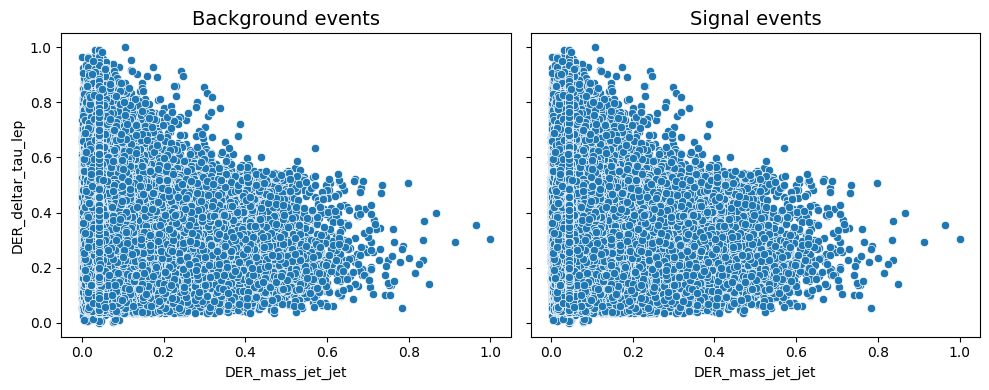

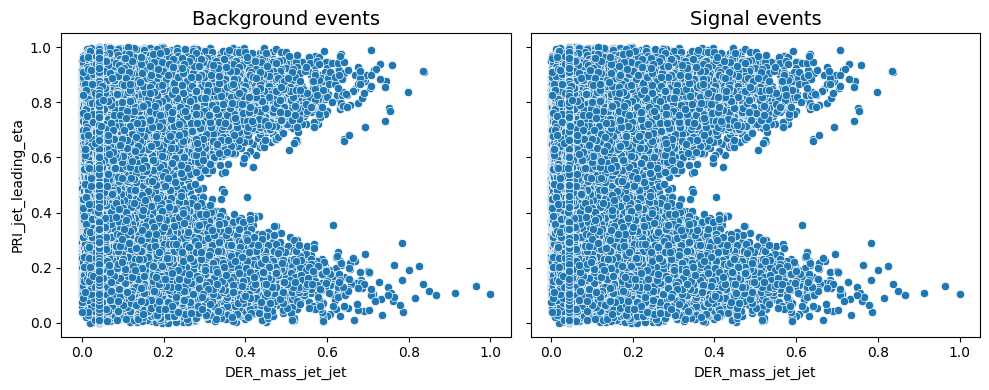

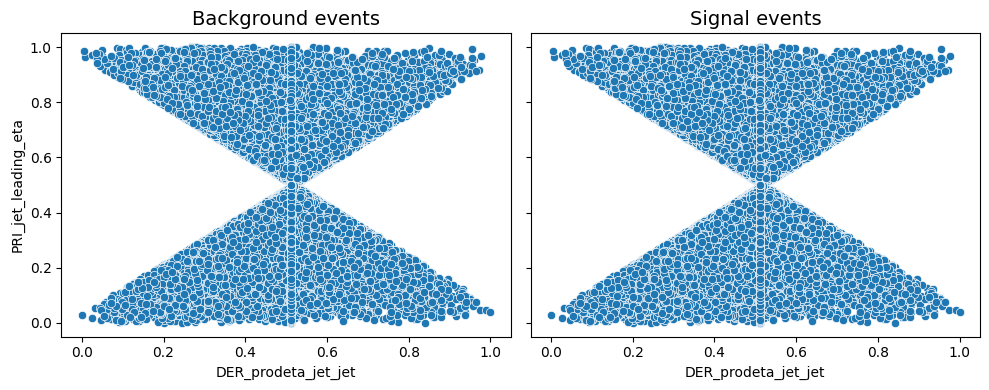

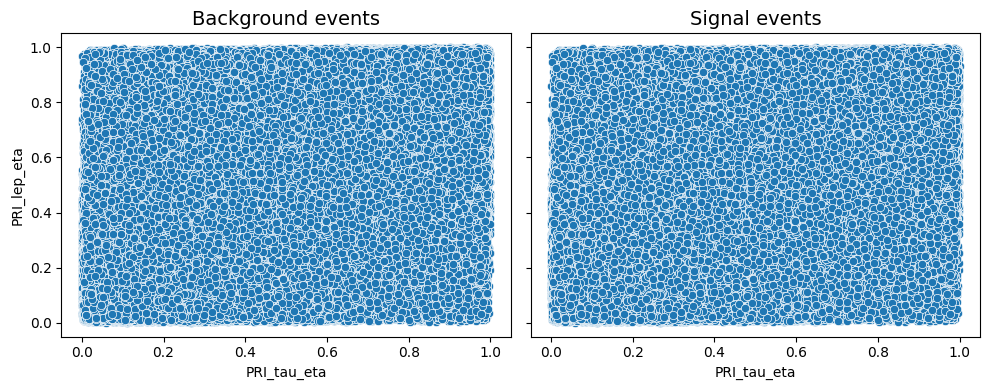

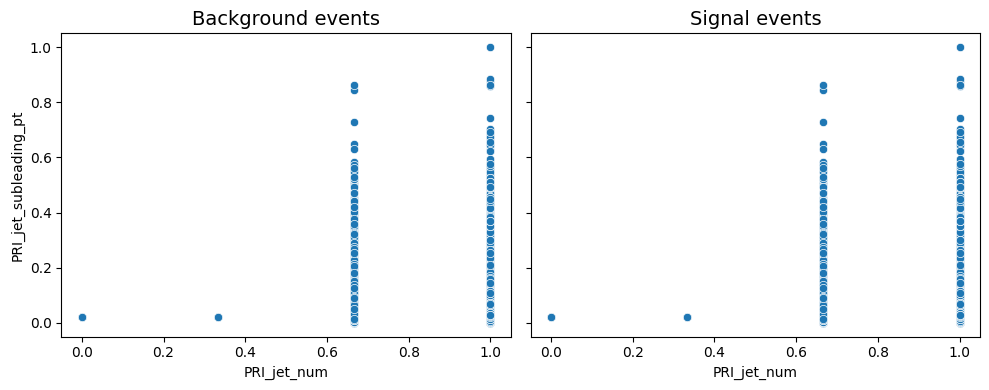

In [7]:

pairs_selected = [
    ('DER_mass_MMC', 'DER_mass_jet_jet'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet'),
    ('DER_mass_jet_jet', 'DER_deltar_tau_lep'),
    ('DER_mass_jet_jet', 'PRI_jet_leading_eta'),
    ('DER_prodeta_jet_jet', 'PRI_jet_leading_eta'),
    ('PRI_tau_eta', 'PRI_lep_eta'),
    ('PRI_jet_num', 'PRI_jet_subleading_pt')
]
for z in pairs_selected:
    fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharex = True, sharey = True)
    sns.scatterplot(data = data_scaled, x = z[0], y = z[1], ax = ax[0])
    sns.scatterplot(data = data_scaled, x = z[0], y = z[1], ax = ax[1])
    ax[0].set_title("Background events", fontsize = 14)
    ax[1].set_title("Signal events", fontsize = 14)
    plt.tight_layout()

plt.show()

### 8- Unbalance Ratio
Display the histogram of the target column to check the existence of a disequilibrium between the positive and negative classes.

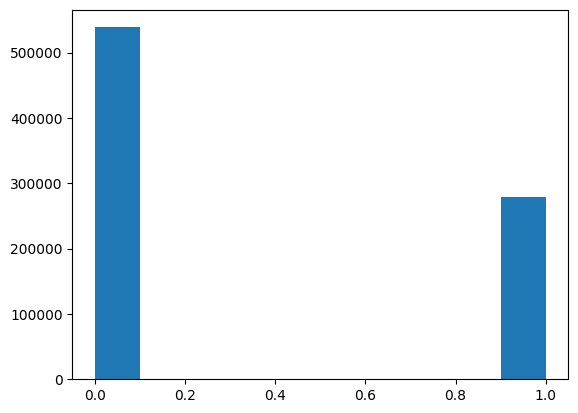

Label
0.0    538678
1.0    279560
Name: count, dtype: int64
<bound method NDFrame.sample of         DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0           0.066707                     0.053326      0.068128  0.009869   
1           0.078287                     0.070992      0.072155  0.016983   
2           0.053322                     0.167417      0.089071  0.012570   
3           0.069508                     0.084050      0.055557  0.000146   
4           0.085980                     0.017462      0.095662  0.005787   
...              ...                          ...           ...       ...   
818233      0.049801                     0.047945      0.039999  0.055094   
818234      0.046515                     0.031070      0.041983  0.023231   
818235      0.051259                     0.010155      0.043797  0.006351   
818236      0.045184                     0.020653      0.045132  0.010498   
818237      0.042948                     0.082700      0.0530

In [8]:

plt.hist(data_scaled['Label'])
plt.show()
print(data_scaled['Label'].value_counts())
print(data_scaled.sample)


### 9- Correlation Matrix

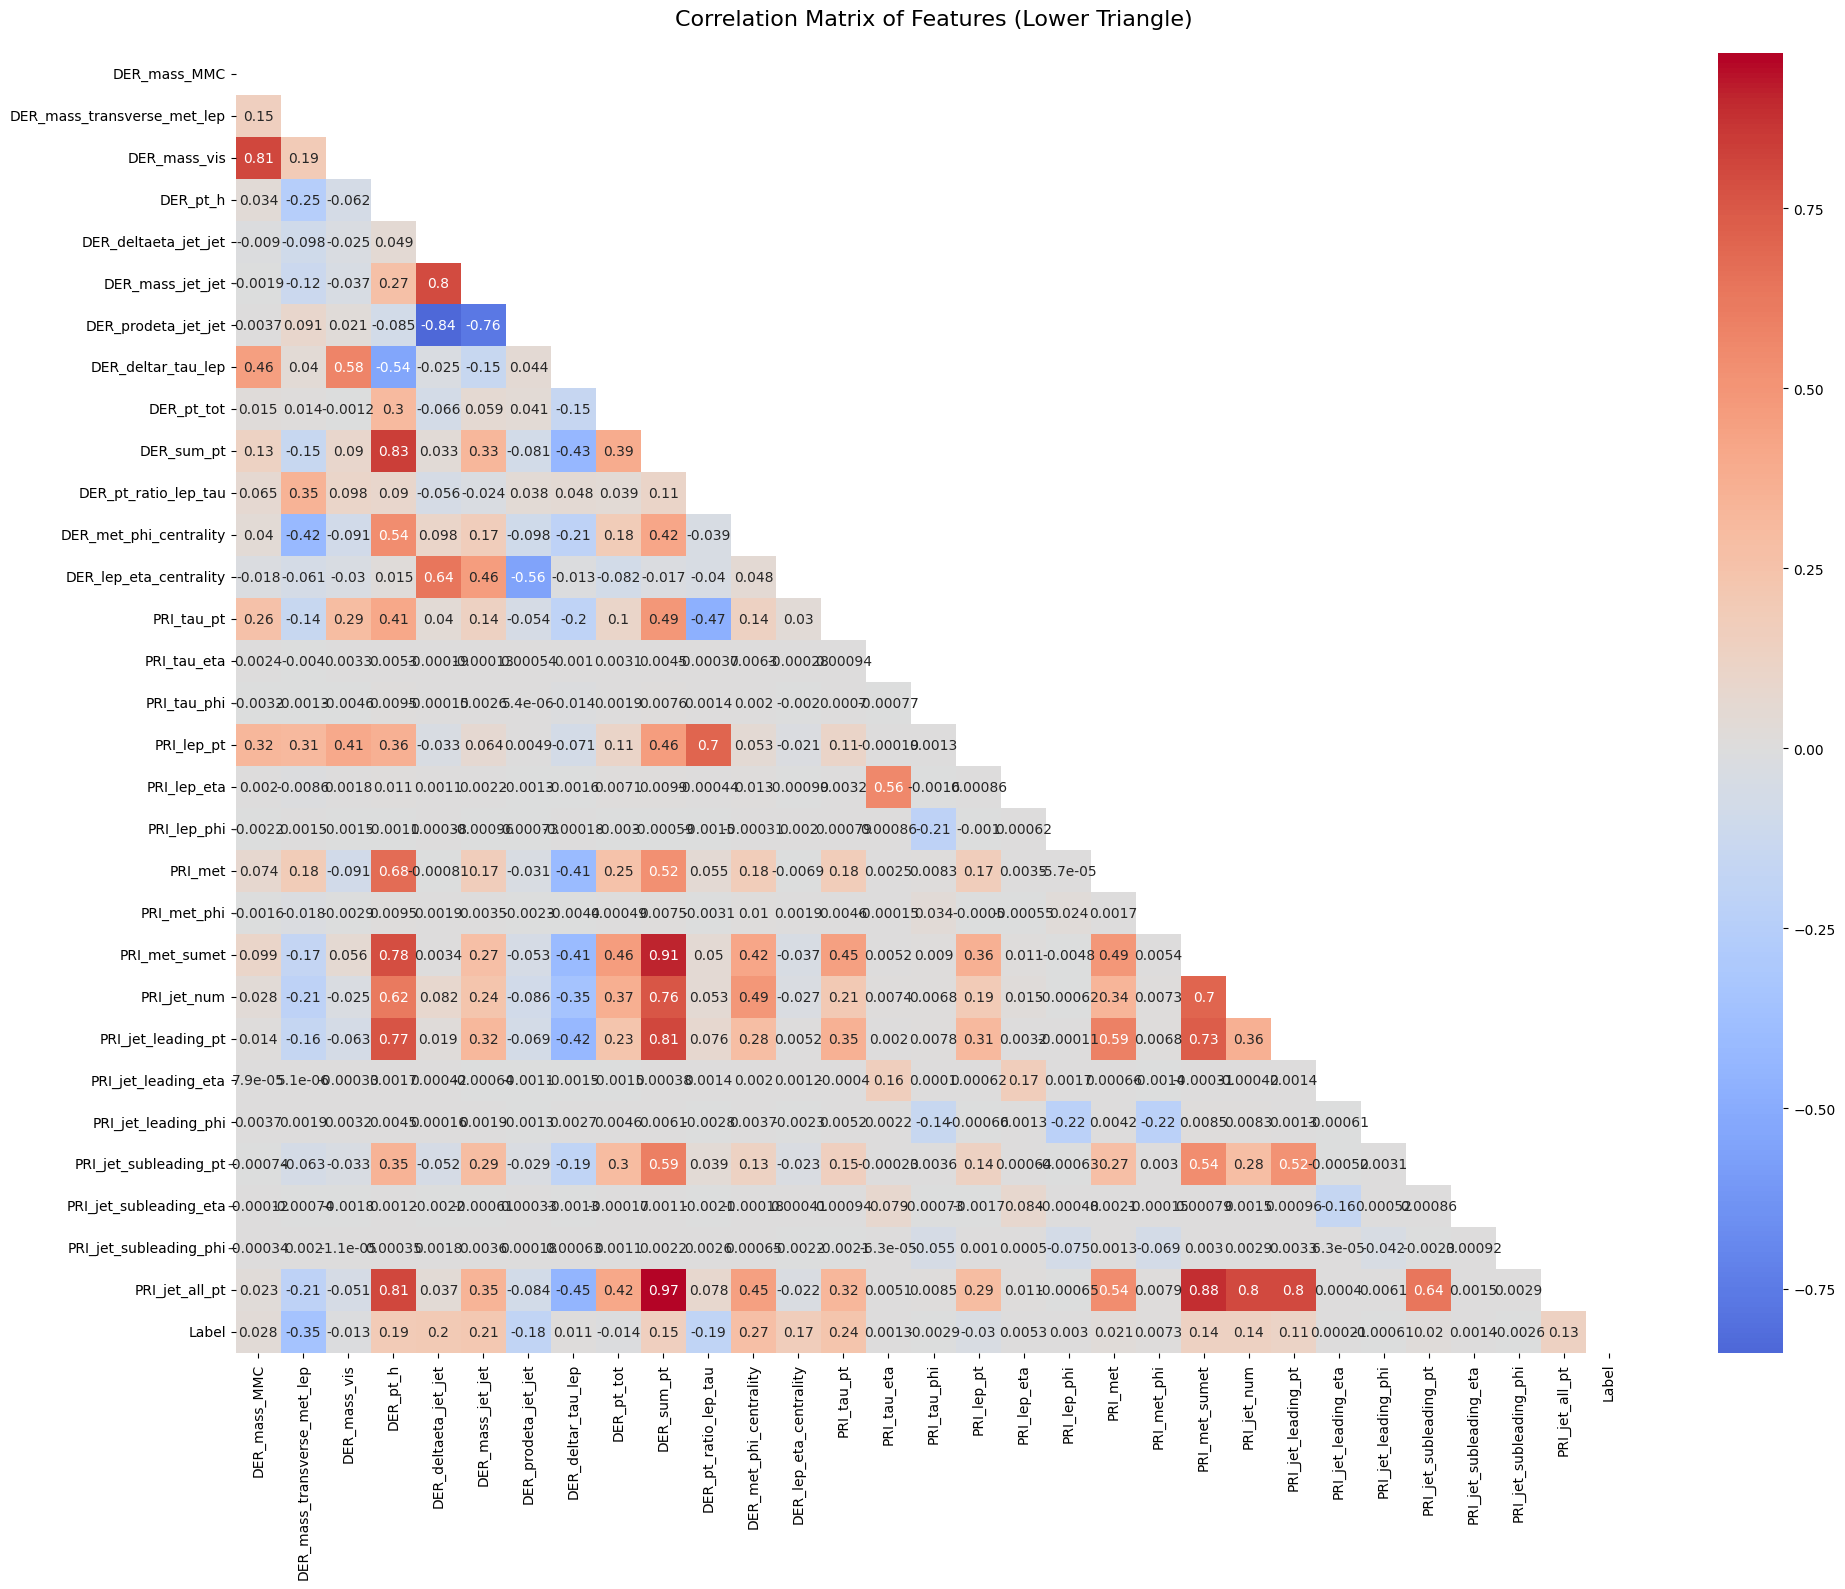

In [9]:
# Create correlation matrix
plt.figure(figsize=(20,16))
correlation_matrix = data_scaled.corr()

# Create heatmap with mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features (Lower Triangle)', pad=20, fontsize=16)
plt.tight_layout()
plt.show()


### 10- Train-Test Split

In [10]:
X = data_scaled.drop('Label', axis=1)
y = data_scaled['Label']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (572766, 30)
Testing set shape: (245472, 30)


## II- Ensemble Learning Implementation

We will implement and compare two main ensemble learning approaches:
1. Bagging Methods
   - Random Forest
   - Bagging Classifier
2. Boosting Methods
   - AdaBoost
   - Gradient Boosting

### Bagging Methods


### Random Forest Implementation

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()
rf_clf.fit(X_train, y_train)
rf_train_time = time.time() - start_time


In [12]:

# Make predictions
start_time = time.time()
rf_pred = rf_clf.predict(X_test)
rf_test_time = time.time() - start_time


Random Forest Results:
Accuracy: 0.8401
Precision: 0.7987
Recall: 0.7120
F1-Score: 0.7528
Training Time: 33.65 seconds
Testing Time: 1.16 seconds


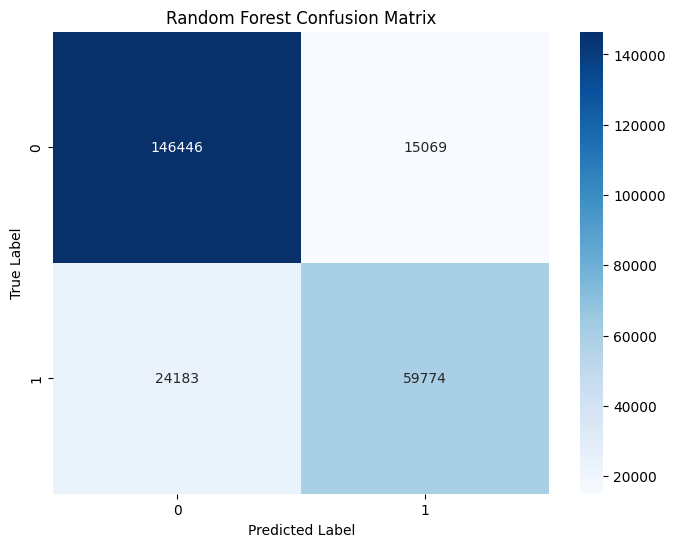

In [13]:

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"Training Time: {rf_train_time:.2f} seconds")
print(f"Testing Time: {rf_test_time:.2f} seconds")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### Boosting Methods

#### Gradient Boosting Implementation

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

start_time = time.time()
gb_clf.fit(X_train, y_train)
gb_train_time = time.time() - start_time


In [15]:

# Make predictions
start_time = time.time()
gb_pred = gb_clf.predict(X_test)
gb_test_time = time.time() - start_time


Gradient Boosting Results:
Accuracy: 0.8310
Precision: 0.7853
Recall: 0.6960
F1-Score: 0.7380
Training Time: 272.38 seconds
Testing Time: 0.25 seconds


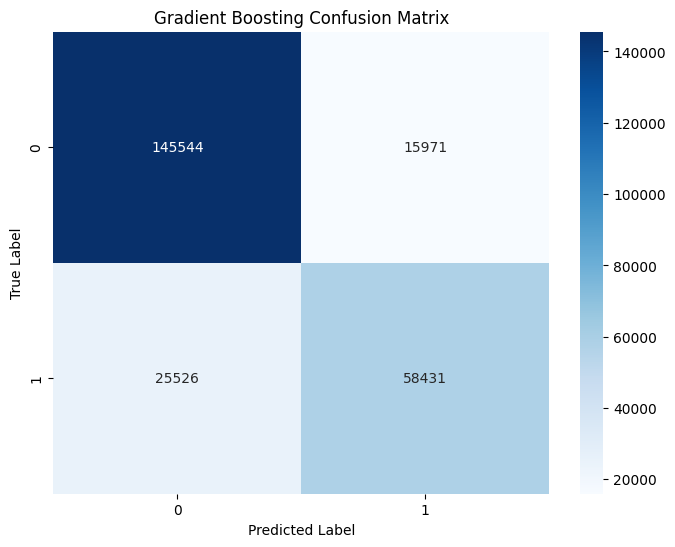

In [16]:

# Calculate metrics
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

print("Gradient Boosting Results:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-Score: {gb_f1:.4f}")
print(f"Training Time: {gb_train_time:.2f} seconds")
print(f"Testing Time: {gb_test_time:.2f} seconds")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### XGBoost Implementation


In [17]:
import xgboost as xgb
# Initialize and train XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

start_time = time.time()
xgb_clf.fit(X_train, y_train)
xgb_train_time = time.time() - start_time


In [18]:

# Make predictions
start_time = time.time()
xgb_pred = xgb_clf.predict(X_test)
xgb_test_time = time.time() - start_time


XGBoost Results:
Accuracy: 0.8403
Precision: 0.7929
Recall: 0.7216
F1-Score: 0.7556
Training Time: 0.98 seconds
Testing Time: 0.05 seconds


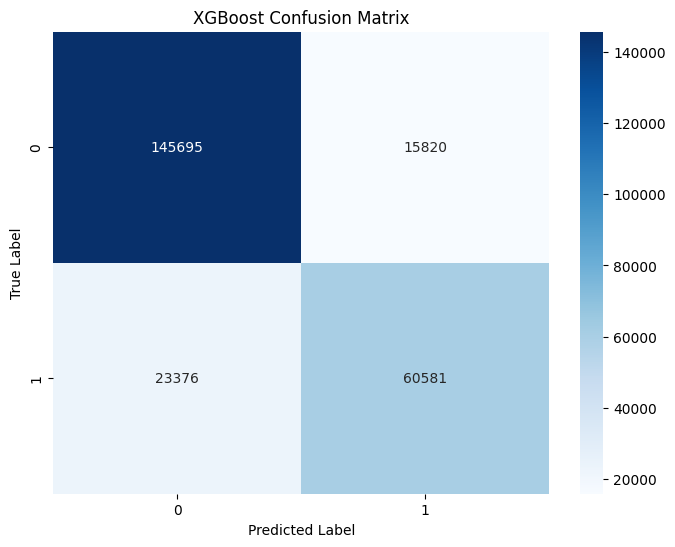

In [19]:

# Calculate metrics
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

print("XGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"Training Time: {xgb_train_time:.2f} seconds")
print(f"Testing Time: {xgb_test_time:.2f} seconds")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## III- Evolutionary Learning with DEAP

In this section, we implement genetic programming-based classifiers using the DEAP library:
1. Problem Definition
2. Primitive and Terminal Sets
3. Fitness Function
4. Training Models (eaSimple and eaMuPlusLambda)

In [20]:
from deap import base, creator, tools, algorithms
import deap.gp as gp
import operator
import random
print(X_train.shape[1])
# Define primitive set for GP
pset = gp.PrimitiveSet("MAIN", X_train.shape[1]) #set the number of input feature
pset.addPrimitive(np.add, 2)
pset.addPrimitive(np.subtract, 2)
pset.addPrimitive(np.multiply, 2)
pset.addPrimitive(np.negative, 1)  # Negation
pset.addEphemeralConstant("rand", lambda: np.random.uniform(-1, 1))  # Random constants

# Add terminal set
pset.renameArguments(**{f"ARG{i}": f"x{i}" for i in range(X_train.shape[1])})

# Create types and fitness
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize accuracy
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

# Create toolbox
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register functions for genetic operators
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr, pset=pset)
toolbox.register("select", tools.selTournament, tournsize=5)



30


/Users/alexs/PycharmProjects/AdvancedML2/.venv/lib/python3.11/site-packages/deap/gp.py:257: RuntimeWarning: Ephemeral rand function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


In [21]:
# Define evaluation function
def eval_classifier(individual, X, y):
    # Transform the GP individual into a callable function
    func = toolbox.compile(expr=individual)
    try:
        # Convert X to numpy array if it's not already
        if hasattr(X, 'values'):
            X = X.values
        # Predict class based on sign, properly unpacking the feature array
        y_pred = [func(*list(map(float, x))) > 0 for x in X]
        return accuracy_score(y, y_pred),
    except Exception as e:
        # Return worst possible fitness if there's an error
        return 0.0,

toolbox.register("evaluate", eval_classifier, X=X_train, y=y_train)

In [22]:
# Define statistics and hall of fame
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)

In [23]:
def plot_log_statistics(logbook):
    """
    Plots the statistics (average, min, max) from the logbook.

    Args:
    - logbook: The logbook object generated by DEAP's evolutionary algorithms.
    """
    # Extract data from the logbook
    gen = logbook.select("gen")           # Generations
    avg = logbook.select("avg")           # Average fitness
    min_ = logbook.select("min")          # Minimum fitness
    max_ = logbook.select("max")          # Maximum fitness

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(gen, avg, label="Average Fitness", color="blue", marker="o")
    plt.plot(gen, min_, label="Minimum Fitness", color="red", linestyle="--")
    plt.plot(gen, max_, label="Maximum Fitness", color="green", linestyle="-.")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Evolution of Fitness Over Generations")
    plt.legend()
    plt.grid()
    plt.show()




### Training with eaSimple

In [24]:
# Parameters
NGEN = 50
population = toolbox.population(n=150)

# Train model
start_time = time.time()
pop, log = algorithms.eaSimple(population, toolbox, 
                              cxpb=0.7,  # crossover probability
                              mutpb=0.3,  # mutation probability
                              stats=stats,
                              halloffame=hof,
                              ngen=NGEN,
                              verbose=True)
ea_simple_time = time.time() - start_time

# Get best individual
best_ind = tools.selBest(pop, 1)[0]
print(f"Best individual fitness: {best_ind.fitness.values[0]}")
print(f"Training time: {ea_simple_time:.2f} seconds")

gen	nevals	avg     	std     	min     	max     
0  	150   	0.472428	0.145675	0.278292	0.672439
1  	90    	0.595895	0.112461	0.307026	0.67244 
2  	90    	0.61427 	0.101245	0.340542	0.686684
3  	92    	0.592335	0.122024	0.32756 	0.721537
4  	81    	0.609975	0.113386	0.327558	0.721537
5  	104   	0.582699	0.136786	0.327479	0.721537
6  	91    	0.60305 	0.128811	0.327572	0.72241 
7  	76    	0.586535	0.146211	0.331079	0.72241 
8  	102   	0.584661	0.143494	0.338266	0.72241 
9  	87    	0.599074	0.145102	0.341487	0.72241 
10 	87    	0.630156	0.124555	0.337049	0.723426
11 	90    	0.6309  	0.132361	0.341504	0.724137
12 	111   	0.631065	0.143152	0.337049	0.724137
13 	81    	0.67571 	0.107015	0.341506	0.72425 
14 	98    	0.652263	0.128138	0.341506	0.72425 
15 	88    	0.664017	0.11925 	0.336041	0.724619
16 	87    	0.667592	0.111878	0.341506	0.724619
17 	81    	0.656912	0.118147	0.341506	0.724619
18 	91    	0.664741	0.11371 	0.337375	0.724619
19 	68    	0.675422	0.111794	0.334442	0.725291
20 	86    	0.

Training with eaSimple


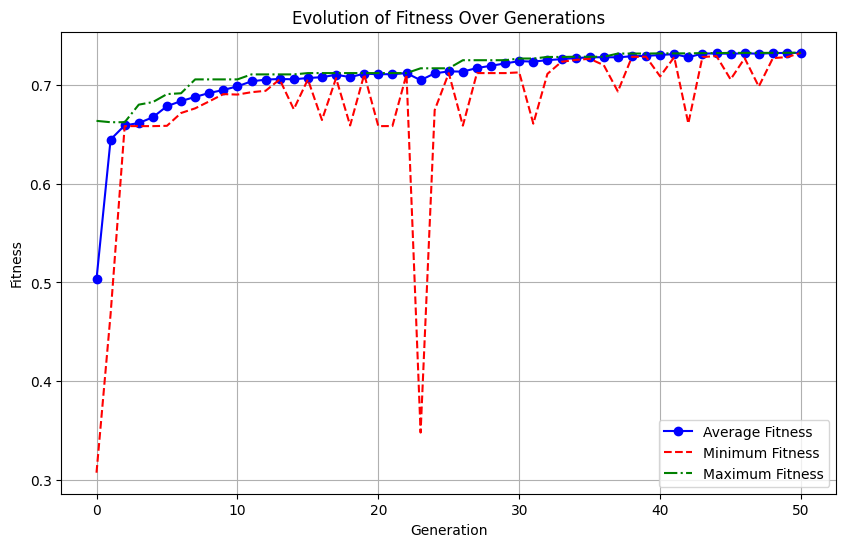

Test Accuracy: 0.74
Test Precision: 0.65
Test Recall: 0.55
Test F1-Score: 0.59


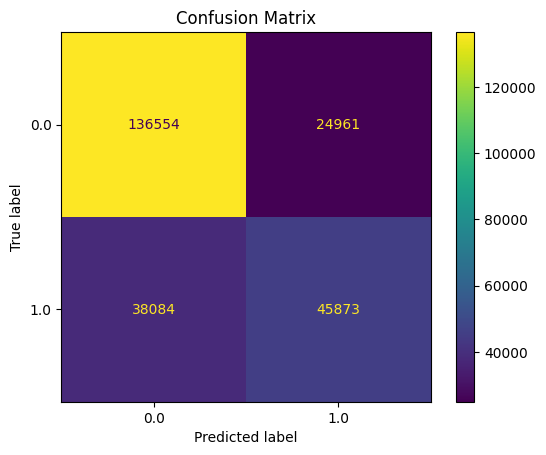

In [33]:
# Test the best individual
best_individual = hof[0]
best_func = toolbox.compile(expr=best_individual)
# Convert test data to numpy array if needed
if hasattr(X_test, 'values'):
    X_test = X_test.values
X_test = X_test.astype(np.float32)
start_time = time.time()
# Make predictions using list comprehension with proper feature unpacking
test_predictions = [best_func(*list(map(float, x))) > 0 for x in X_test]
test_time_simple = time.time() - start_time

print("Training with eaSimple")
plot_log_statistics(log)
# TODO: Calculate and print the test accuracy
test_accuracy_simple = accuracy_score(y_test, test_predictions)
test_precision_simple = precision_score(y_test, test_predictions)
test_recall_simple = recall_score(y_test, test_predictions)
test_f1_simple = f1_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy_simple:.2f}")
print(f"Test Precision: {test_precision_simple:.2f}")
print(f"Test Recall: {test_recall_simple:.2f}")
print(f"Test F1-Score: {test_f1_simple:.2f}")
# TODO: calculate and plot the confusion matrix with metrics labrary of scikit-learn
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.title('Confusion Matrix')
plt.show()

### Training with eaMuPlusLambda

In [26]:
# Parameters
MU = 50
LAMBDA = 100

# Create initial population
pop = toolbox.population(n=MU + LAMBDA)

# Train model
start_time = time.time()
pop, log = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, 
                                    cxpb=0.7,  # crossover probability
                                    mutpb=0.3,  # mutation probability
                                    ngen=NGEN,
                                    stats=stats,
                                    halloffame=hof,
                                    verbose=True)
ea_mu_plus_lambda_time = time.time() - start_time

# Get best individual
best_ind = tools.selBest(pop, 1)[0]
print(f"Best individual fitness: {best_ind.fitness.values[0]}")
print(f"Training time: {ea_mu_plus_lambda_time:.2f} seconds")


gen	nevals	avg     	std     	min     	max     
0  	150   	0.503289	0.141072	0.307026	0.663833
1  	69    	0.644895	0.0403227	0.467852	0.662452
2  	64    	0.659256	0.00150968	0.658494	0.662452
3  	70    	0.661593	0.00477881	0.658494	0.680274
4  	71    	0.667509	0.00834648	0.658494	0.682879
5  	72    	0.678697	0.00687948	0.658812	0.690966
6  	72    	0.683914	0.00474925	0.671793	0.69182 
7  	67    	0.688103	0.0055377 	0.676514	0.705875
8  	63    	0.692118	0.00439382	0.683595	0.705875
9  	72    	0.695119	0.005509  	0.690966	0.705875
10 	76    	0.69886 	0.00630549	0.690481	0.705875
11 	65    	0.703898	0.00455419	0.692903	0.710947
12 	71    	0.705643	0.00238903	0.694289	0.710947
13 	69    	0.706305	0.00137976	0.705875	0.710947
14 	69    	0.705978	0.00464236	0.675585	0.710947
15 	71    	0.707268	0.00205426	0.705875	0.712272
16 	72    	0.708119	0.00659342	0.664704	0.712272
17 	59    	0.710574	0.00158434	0.707128	0.712272
18 	77    	0.708225	0.0118571 	0.659142	0.712272
19 	70    	0.711662	0.000

Training with eaMuPlusLambda


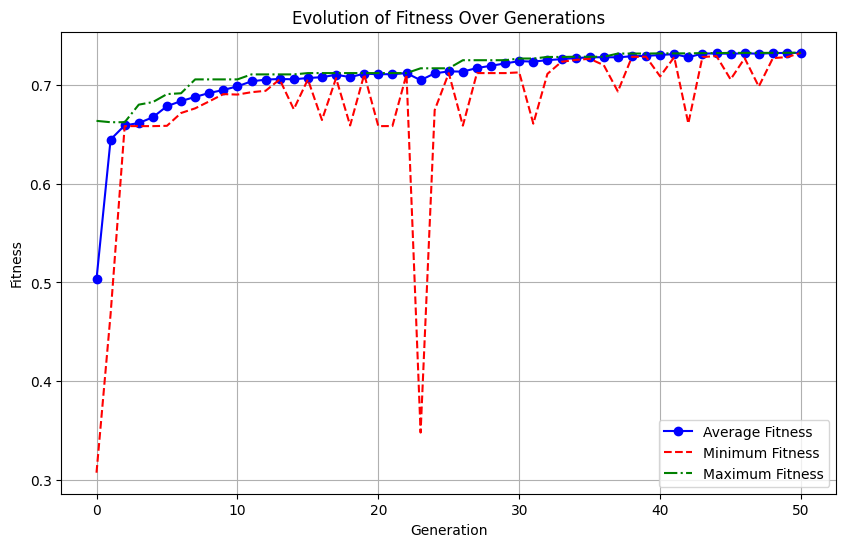

Test Accuracy: 0.74
Test Precision: 0.65
Test Recall: 0.55
Test F1-Score: 0.59


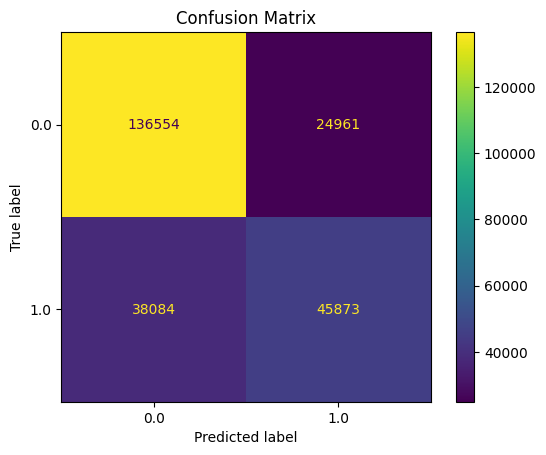

In [34]:
# Test the best individual
best_individual = hof[0]
best_func = toolbox.compile(expr=best_individual)
# Convert test data to numpy array if needed
if hasattr(X_test, 'values'):
    X_test = X_test.values
X_test = X_test.astype(np.float32)
start_time = time.time()
# Make predictions using list comprehension with proper feature unpacking
test_predictions = [best_func(*list(map(float, x))) > 0 for x in X_test]
test_time_mu_plus_lambda = time.time() - start_time
print("Training with eaMuPlusLambda")
plot_log_statistics(log)
# TODO: Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.title('Confusion Matrix')
plt.show()

## IV- Performance Comparison


Model Performance Metrics:


,Method,Accuracy,Precision,Recall,F1-Score,Training Time,Testing Time
0,Random Forest,0.840096,0.798659,0.711960,0.752821,33.652992,1.158843
1,Gradient Boosting,0.830950,0.785342,0.695963,0.737956,272.379942,0.246562
2,XGBoost,0.840324,0.792935,0.721572,0.755572,0.984145,0.048406
3,GP (eaSimple),0.743168,0.647613,0.546387,0.592709,11780.448941,3.100767
4,GP (eaMuPlusLambda),0.743168,0.647613,0.546387,0.592709,11378.606803,2.942034


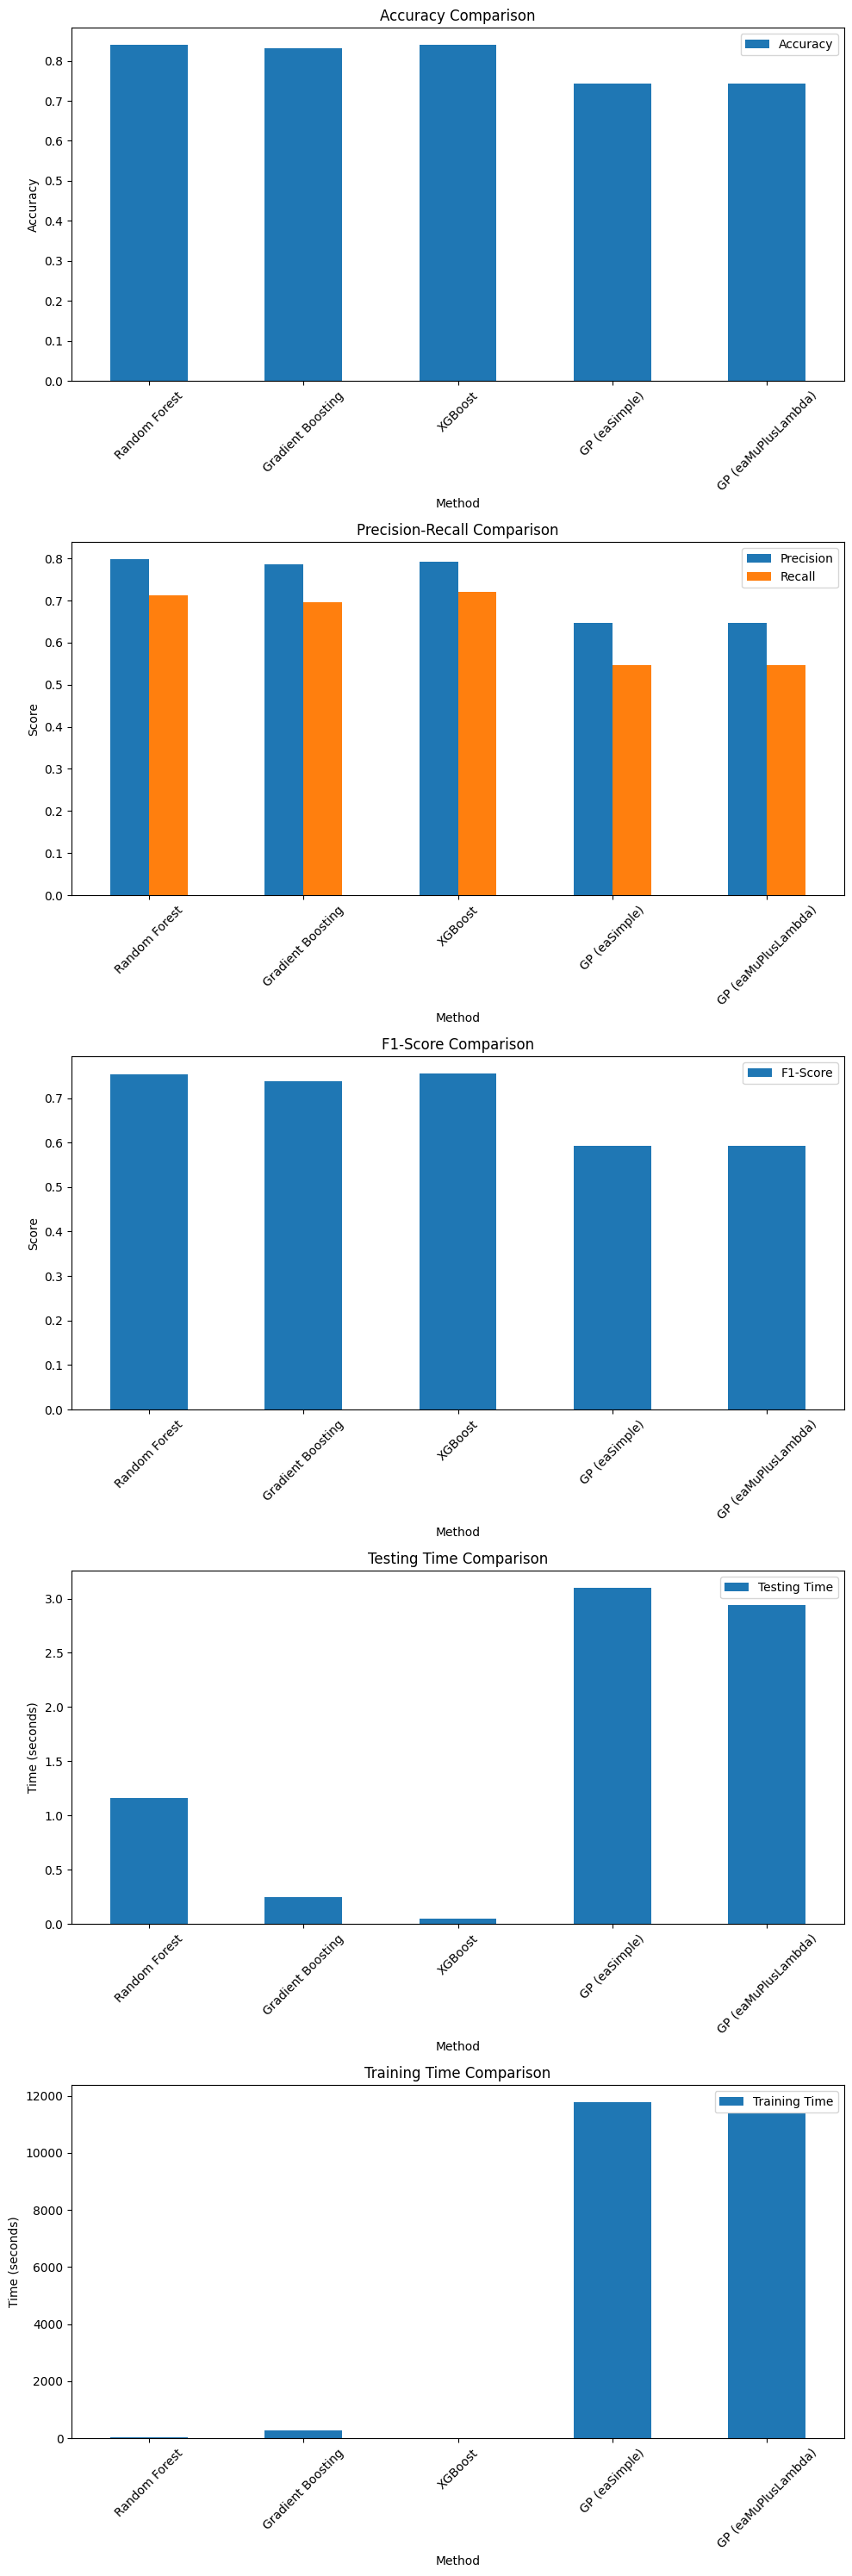

In [38]:
# Create comparison dataframe
results = pd.DataFrame({
    'Method': ['Random Forest', 'Gradient Boosting', 'XGBoost', 'GP (eaSimple)', 'GP (eaMuPlusLambda)'],
    'Accuracy': [rf_accuracy, gb_accuracy, xgb_accuracy, test_accuracy_simple, test_accuracy],
    'Precision': [rf_precision, gb_precision, xgb_precision, test_precision_simple, test_precision],
    'Recall': [rf_recall, gb_recall, xgb_recall, test_recall_simple, test_recall],
    'F1-Score': [rf_f1, gb_f1, xgb_f1, test_f1_simple, test_f1],
    'Training Time': [rf_train_time, gb_train_time, xgb_train_time, ea_simple_time, ea_mu_plus_lambda_time],
    'Testing Time': [rf_test_time, gb_test_time, xgb_test_time, test_time_simple, test_time_mu_plus_lambda]
})

# Display results table
print("\nModel Performance Metrics:")
display(results)

# Plot results
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 30))

# Accuracy comparison
results.plot(kind='bar', x='Method', y='Accuracy', ax=ax1)
ax1.set_title('Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)


# Precision-Recall comparison
results.plot(kind='bar', x='Method', y=['Precision', 'Recall'], ax=ax2)
ax2.set_title('Precision-Recall Comparison')
ax2.set_ylabel('Score')
ax2.tick_params(axis='x', rotation=45)

# F1-Score comparison
results.plot(kind='bar', x='Method', y='F1-Score', ax=ax3)
ax3.set_title('F1-Score Comparison')
ax3.set_ylabel('Score')
ax3.tick_params(axis='x', rotation=45)

# Testing time comparison
results.plot(kind='bar', x='Method', y='Testing Time', ax=ax4)
ax4.set_title('Testing Time Comparison')
ax4.set_ylabel('Time (seconds)')
ax4.tick_params(axis='x', rotation=45)

# Training time comparison
results.plot(kind='bar', x='Method', y='Training Time', ax=ax5)
ax5.set_title('Training Time Comparison')
ax5.set_ylabel('Time (seconds)')
ax5.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()